<a href="https://colab.research.google.com/github/umutcanc7/DSA210-PROJECT-/blob/main/Analysis_of_Step_Count_and_Match_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

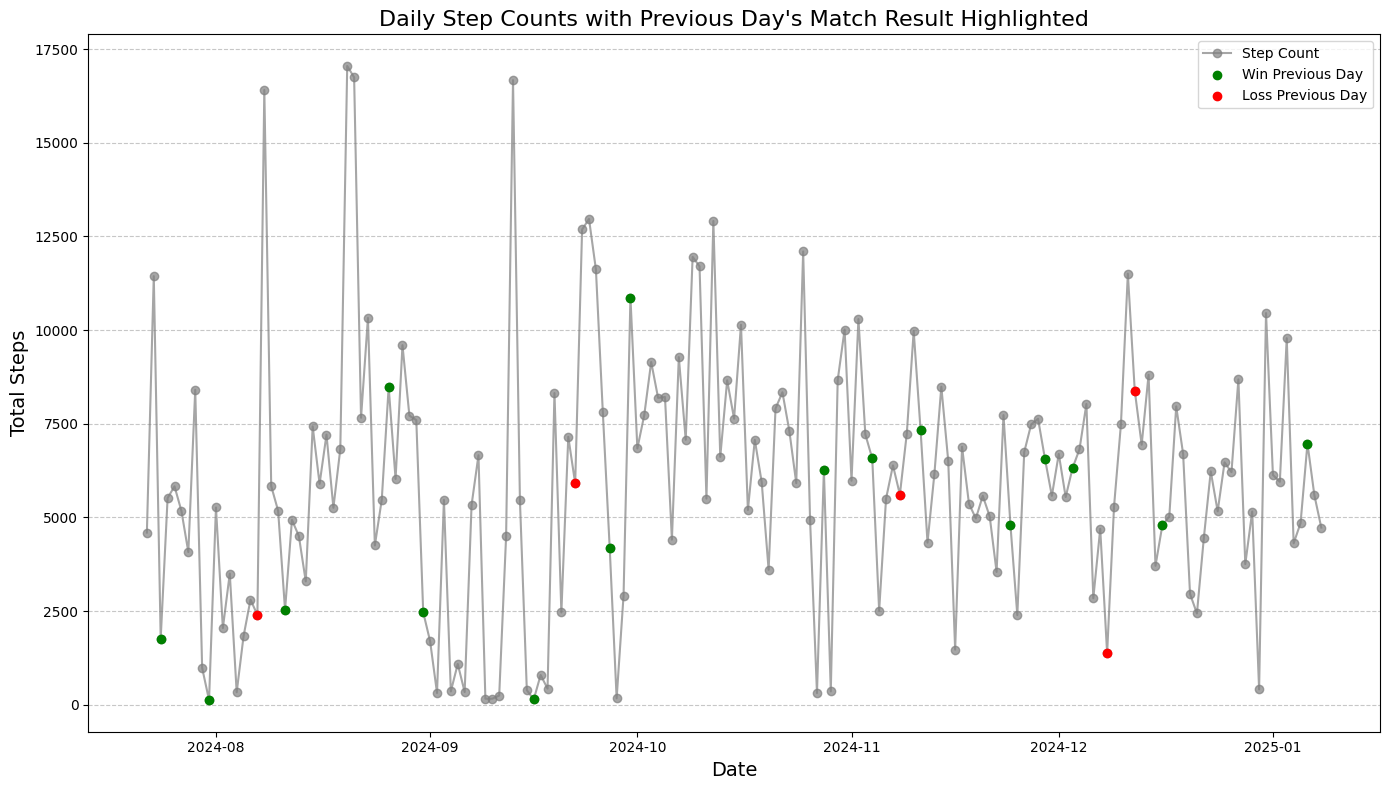

In [1]:
# This script analyzes the relationship between daily step counts and match outcomes.
# This visualization highlights the day after matchdays, coloring them green if the previous day was a win and red if it was a loss.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets (upload your CSV files in Google Colab before running this code)
# Step count data
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

# Load step count data
step_data = pd.read_csv(step_count_file)

# Load match data
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Add a column for the result of the previous day
combined_data['Previous Day Result'] = combined_data['Result'].shift(1)

# Visualization: Step Count over Time with Previous Day Result Highlighted
plt.figure(figsize=(14, 8))
plt.plot(combined_data['Date'], combined_data['Total Steps'], label='Step Count', color='gray', marker='o', linestyle='-', alpha=0.7)

# Highlight the day after matchdays based on previous day result
win_days = combined_data[combined_data['Previous Day Result'] == 'Win']
loss_days = combined_data[combined_data['Previous Day Result'] == 'Loss']
plt.scatter(win_days['Date'], win_days['Total Steps'], color='green', label='Win Previous Day', zorder=5)
plt.scatter(loss_days['Date'], loss_days['Total Steps'], color='red', label='Loss Previous Day', zorder=5)

# Add title and labels
plt.title("Daily Step Counts with Previous Day's Match Result Highlighted", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Steps', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


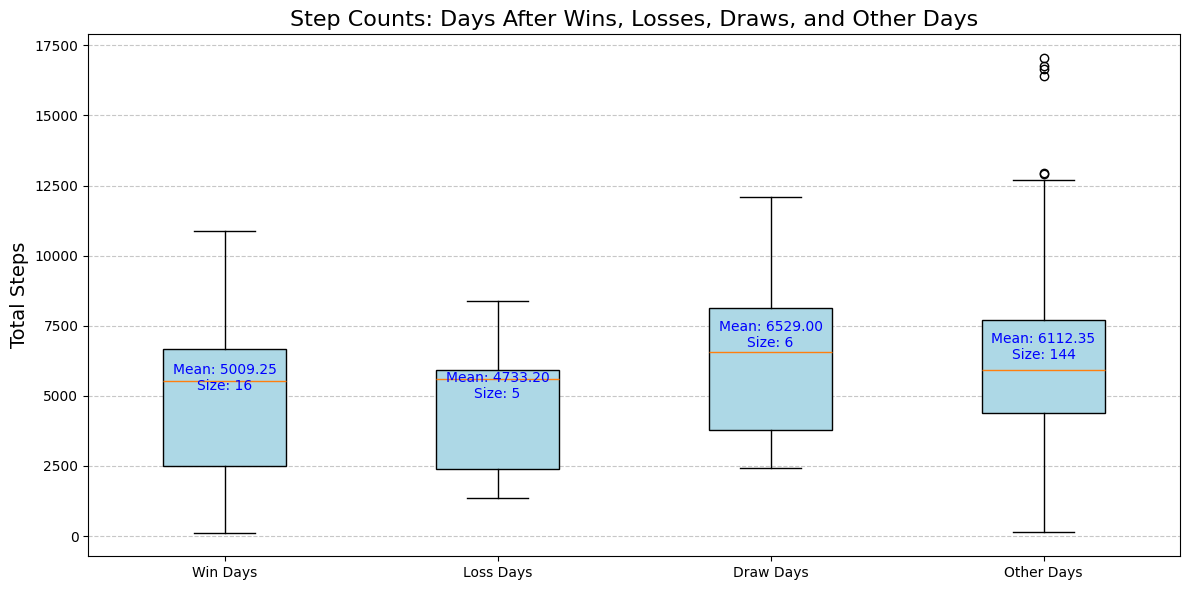

In [10]:
# This script analyzes the relationship between daily step counts and match outcomes.
# This visualization includes box plots for step counts on matchdays, non-matchdays, and days following wins or losses.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets (upload your CSV files in Google Colab before running this code)
# Step count data
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

# Load step count data
step_data = pd.read_csv(step_count_file)

# Load match data
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Add a column for the result of the previous day
combined_data['Previous Day Result'] = combined_data['Result'].shift(1)

# Separate data into matchdays, non-matchdays, and previous day outcomes
matchdays = combined_data[combined_data['Matchday'] == True]['Total Steps']
non_matchdays = combined_data[combined_data['Matchday'] == False]['Total Steps']
win_days = combined_data[combined_data['Previous Day Result'] == 'Win']['Total Steps']
loss_days = combined_data[combined_data['Previous Day Result'] == 'Loss']['Total Steps']

# Visualization: Box Plots for Subgroups
plt.figure(figsize=(16, 6))

# Subplot 1: Step counts on matchdays
plt.subplot(1, 3, 1)
plt.boxplot(matchdays.dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Matchdays', fontsize=14)
plt.ylabel('Total Steps', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Step counts on non-matchdays
plt.subplot(1, 3, 2)
plt.boxplot(non_matchdays.dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Non-Matchdays', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 3: Step counts following wins and losses
plt.subplot(1, 3, 3)
plt.boxplot([win_days.dropna(), loss_days.dropna()], labels=['Win', 'Loss'], patch_artist=True, boxprops=dict(facecolor='salmon'))
plt.title('Days After Wins and Losses', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Win Days Correlation:
Pearson Correlation: -0.09, p-value: 0.2337
Spearman Correlation: -0.09, p-value: 0.2689

Loss Days Correlation:
Pearson Correlation: -0.06, p-value: 0.4096
Spearman Correlation: -0.05, p-value: 0.4818


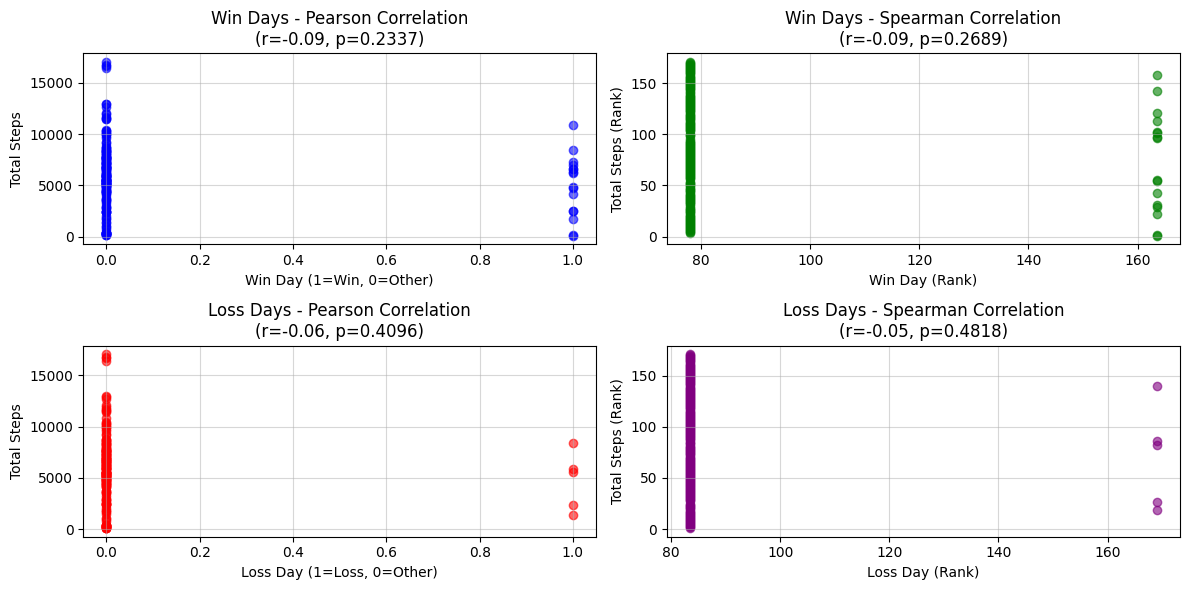

In [14]:
# This script calculates and visualizes the correlation between win-days, loss-days, and step counts.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load the datasets (upload your CSV files in Google Colab before running this code)
# Step count data
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

# Load step count data
step_data = pd.read_csv(step_count_file)

# Load match data
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Add a column for the result of the previous day
combined_data['Previous Day Result'] = combined_data['Result'].shift(1)

# Add binary columns for win-days and loss-days
combined_data['IsWinDay'] = (combined_data['Previous Day Result'] == 'Win').astype(int)
combined_data['IsLossDay'] = (combined_data['Previous Day Result'] == 'Loss').astype(int)

# Calculate Pearson and Spearman correlations for win-days
print("Win Days Correlation:")
pearson_corr_win, pearson_pval_win = pearsonr(combined_data['IsWinDay'], combined_data['Total Steps'])
print(f"Pearson Correlation: {pearson_corr_win:.2f}, p-value: {pearson_pval_win:.4f}")
spearman_corr_win, spearman_pval_win = spearmanr(combined_data['IsWinDay'], combined_data['Total Steps'])
print(f"Spearman Correlation: {spearman_corr_win:.2f}, p-value: {spearman_pval_win:.4f}")

# Calculate Pearson and Spearman correlations for loss-days
print("\nLoss Days Correlation:")
pearson_corr_loss, pearson_pval_loss = pearsonr(combined_data['IsLossDay'], combined_data['Total Steps'])
print(f"Pearson Correlation: {pearson_corr_loss:.2f}, p-value: {pearson_pval_loss:.4f}")
spearman_corr_loss, spearman_pval_loss = spearmanr(combined_data['IsLossDay'], combined_data['Total Steps'])
print(f"Spearman Correlation: {spearman_corr_loss:.2f}, p-value: {spearman_pval_loss:.4f}")

# Visualization of Correlations
plt.figure(figsize=(12, 6))

# Scatter plot for Pearson correlation (Win Days)
plt.subplot(2, 2, 1)
plt.scatter(combined_data['IsWinDay'], combined_data['Total Steps'], alpha=0.6, color='blue')
plt.title(f"Win Days - Pearson Correlation\n(r={pearson_corr_win:.2f}, p={pearson_pval_win:.4f})", fontsize=12)
plt.xlabel('Win Day (1=Win, 0=Other)', fontsize=10)
plt.ylabel('Total Steps', fontsize=10)
plt.grid(alpha=0.5)

# Scatter plot for Spearman correlation (Win Days)
ranked_data_win = combined_data[['IsWinDay', 'Total Steps']].rank()
plt.subplot(2, 2, 2)
plt.scatter(ranked_data_win['IsWinDay'], ranked_data_win['Total Steps'], alpha=0.6, color='green')
plt.title(f"Win Days - Spearman Correlation\n(r={spearman_corr_win:.2f}, p={spearman_pval_win:.4f})", fontsize=12)
plt.xlabel('Win Day (Rank)', fontsize=10)
plt.ylabel('Total Steps (Rank)', fontsize=10)
plt.grid(alpha=0.5)

# Scatter plot for Pearson correlation (Loss Days)
plt.subplot(2, 2, 3)
plt.scatter(combined_data['IsLossDay'], combined_data['Total Steps'], alpha=0.6, color='red')
plt.title(f"Loss Days - Pearson Correlation\n(r={pearson_corr_loss:.2f}, p={pearson_pval_loss:.4f})", fontsize=12)
plt.xlabel('Loss Day (1=Loss, 0=Other)', fontsize=10)
plt.ylabel('Total Steps', fontsize=10)
plt.grid(alpha=0.5)

# Scatter plot for Spearman correlation (Loss Days)
ranked_data_loss = combined_data[['IsLossDay', 'Total Steps']].rank()
plt.subplot(2, 2, 4)
plt.scatter(ranked_data_loss['IsLossDay'], ranked_data_loss['Total Steps'], alpha=0.6, color='purple')
plt.title(f"Loss Days - Spearman Correlation\n(r={spearman_corr_loss:.2f}, p={spearman_pval_loss:.4f})", fontsize=12)
plt.xlabel('Loss Day (Rank)', fontsize=10)
plt.ylabel('Total Steps (Rank)', fontsize=10)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


The correlation results for both win-days and loss-days suggest a very weak and statistically insignificant relationship with step counts. For win-days, the Pearson and Spearman correlation coefficients are both -0.09, indicating a negligible negative correlation, with p-values of 0.2337 and 0.2689, respectively, which are much higher than the standard significance threshold of 0.05. Similarly, for loss-days, the Pearson and Spearman coefficients are -0.06 and -0.05, respectively, again showing a very weak negative correlation with p-values of 0.4096 and 0.4818. These results indicate that neither win-days nor loss-days have a meaningful or statistically significant impact on step counts.

Observed Difference: -1074.74
Randomized p-value: 0.2390


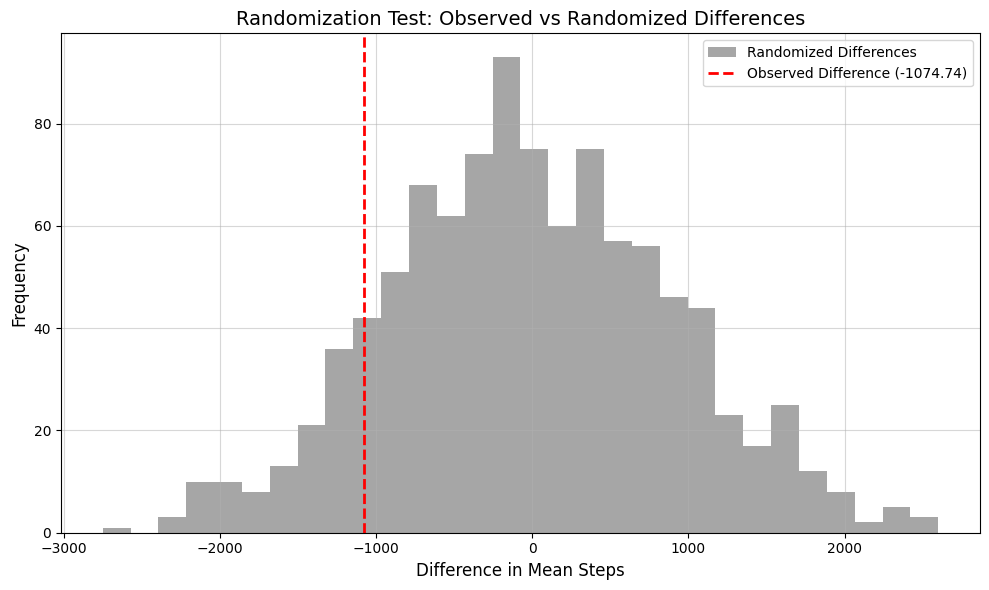

In [15]:
# This script calculates and visualizes the correlation between win-days and step counts, including a randomized p-value test.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# Load the datasets (upload your CSV files in Google Colab before running this code)
# Step count data
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

# Load step count data
step_data = pd.read_csv(step_count_file)

# Load match data
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Add a column for the result of the previous day
combined_data['Previous Day Result'] = combined_data['Result'].shift(1)

# Add a binary column for win-days (1 for win-days, 0 otherwise)
combined_data['IsWinDay'] = (combined_data['Previous Day Result'] == 'Win').astype(int)

# Separate step counts for win-days and other days
win_steps = combined_data[combined_data['IsWinDay'] == 1]['Total Steps']
other_steps = combined_data[combined_data['IsWinDay'] == 0]['Total Steps']
observed_diff = win_steps.mean() - other_steps.mean()

# Randomized p-value test
n_iterations = 1000
random_diffs = []
all_steps = combined_data['Total Steps'].dropna()

for _ in range(n_iterations):
    shuffled = np.random.permutation(combined_data['IsWinDay'])
    shuffled_win_steps = all_steps[shuffled == 1]
    shuffled_other_steps = all_steps[shuffled == 0]
    random_diffs.append(shuffled_win_steps.mean() - shuffled_other_steps.mean())

# Calculate p-value
random_diffs = np.array(random_diffs)
p_value = (np.abs(random_diffs) >= np.abs(observed_diff)).mean()

# Output results
print(f"Observed Difference: {observed_diff:.2f}")
print(f"Randomized p-value: {p_value:.4f}")

# Visualization: Histogram of Randomized Differences
plt.figure(figsize=(10, 6))
plt.hist(random_diffs, bins=30, color='gray', alpha=0.7, label='Randomized Differences')
plt.axvline(observed_diff, color='red', linestyle='--', linewidth=2, label=f'Observed Difference ({observed_diff:.2f})')
plt.title('Randomization Test: Observed vs Randomized Differences', fontsize=14)
plt.xlabel('Difference in Mean Steps', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


The observed difference of -1074.74 indicates that, on average, step counts on win-days are lower by approximately 1074 steps compared to other days (including losses and draws). However, the randomized p-value of 0.2390 is much greater than the standard significance threshold of 0.05. This suggests that the observed difference is not statistically significant and could easily occur by chance. Therefore, we fail to reject the null hypothesis, concluding that there is no strong evidence to suggest that winning a match significantly impacts step counts the next day.

Mann-Whitney U Test Results: U-statistic = 1031.00, p-value = 0.2688


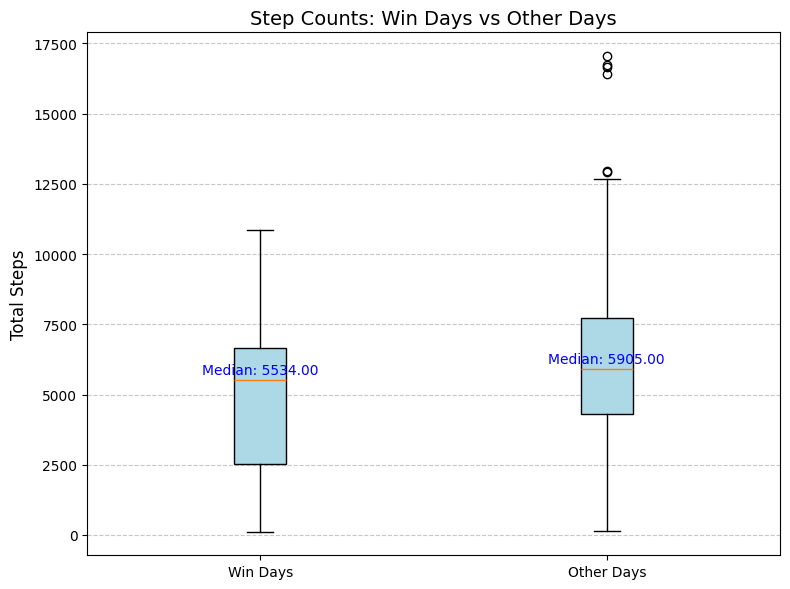

In [17]:
# This script calculates and visualizes the correlation between win-days and step counts, including a Mann-Whitney U Test.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

# Load the datasets (upload your CSV files in Google Colab before running this code)
# Step count data
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

# Load step count data
step_data = pd.read_csv(step_count_file)

# Load match data
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Add a column for the result of the previous day
combined_data['Previous Day Result'] = combined_data['Result'].shift(1)

# Add a binary column for win-days (1 for win-days, 0 otherwise)
combined_data['IsWinDay'] = (combined_data['Previous Day Result'] == 'Win').astype(int)

# Separate step counts for win-days and other days
win_steps = combined_data[combined_data['IsWinDay'] == 1]['Total Steps']
other_steps = combined_data[combined_data['IsWinDay'] == 0]['Total Steps']

# Perform Mann-Whitney U Test
u_stat, u_pval = mannwhitneyu(win_steps, other_steps, alternative='two-sided')
print(f"Mann-Whitney U Test Results: U-statistic = {u_stat:.2f}, p-value = {u_pval:.4f}")

# Visualization: Box Plot for Win Days vs Other Days
plt.figure(figsize=(8, 6))
plt.boxplot([win_steps.dropna(), other_steps.dropna()], tick_labels=['Win Days', 'Other Days'], patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.title("Step Counts: Win Days vs Other Days", fontsize=14)
plt.ylabel("Total Steps", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add line values to the boxes
win_median = win_steps.median()
other_median = other_steps.median()
plt.text(1, win_median + 200, f"Median: {win_median:.2f}", ha='center', fontsize=10, color='blue')
plt.text(2, other_median + 200, f"Median: {other_median:.2f}", ha='center', fontsize=10, color='blue')

plt.tight_layout()
plt.show()


The Mann-Whitney U test results indicate no statistically significant difference in step counts between win-days and other days. The U-statistic of 1031.00 reflects the rank-based comparison of the two groups, and the p-value of 0.2688 is much greater than the common significance threshold of 0.05. This suggests that the observed difference in step counts between win-days and other days could likely have occurred by chance, and there is no strong evidence to support a meaningful impact of winning a match on step counts the next day.